# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Read Dataset

In [2]:
books_df = pd.read_excel('datasets/Amazon_top100_bestselling_books_2009to2021.xlsx')

In [3]:
books_df.head()

Unnamed: 0  price  ranks                                          title  \
0           0  12.49    1.0                                The Lost Symbol   
1           1  13.40    2.0    The Shack: Where Tragedy Confronts Eternity   
2           2   9.93    3.0  Liberty and Tyranny: A Conservative Manifesto   
3           3  14.30    4.0      Breaking Dawn (The Twilight Saga, Book 4)   
4           4   9.99    5.0                  Going Rogue: An American Life   

   no_of_reviews  ratings            author cover_type  year        genre  
0        16118.0      4.4         Dan Brown  Hardcover  2009      Fiction  
1        23392.0      4.7  William P. Young  Paperback  2009      Fiction  
2         5036.0      4.8     Mark R. Levin  Hardcover  2009  Non Fiction  
3        16912.0      4.7   Stephenie Meyer  Hardcover  2009      Fiction  
4         1572.0      4.6       Sarah Palin  Hardcover  2009  Non Fiction

# Data Analysis

In [4]:
books_df.shape

(1291, 10)

In [5]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1291 entries, 0 to 1290
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1291 non-null   int64  
 1   price          1287 non-null   float64
 2   ranks          1287 non-null   float64
 3   title          1286 non-null   object 
 4   no_of_reviews  1287 non-null   float64
 5   ratings        1287 non-null   float64
 6   author         1286 non-null   object 
 7   cover_type     1286 non-null   object 
 8   year           1291 non-null   int64  
 9   genre          1288 non-null   object 
dtypes: float64(4), int64(2), object(4)
memory usage: 101.0+ KB


In [6]:
books_df.describe().T.round(2)

count      mean       std      min      25%      50%  \
Unnamed: 0     1291.0    645.00    372.82     0.00   322.50    645.0   
price          1287.0     13.76     10.05     1.17     8.55     12.1   
ranks          1287.0     50.25     28.80     1.00    25.00     50.0   
no_of_reviews  1287.0  25827.71  32224.06    50.00  6769.00  16845.0   
ratings        1287.0      4.65      0.20     3.40     4.60      4.7   
year           1291.0   2015.03      3.73  2009.00  2012.00   2015.0   

                    75%       max  
Unnamed: 0       967.50    1290.0  
price             16.29     144.0  
ranks             75.00     100.0  
no_of_reviews  32326.00  344811.0  
ratings            4.80       4.9  
year            2018.00    2021.0

## Missed Value Problem

In [7]:
books_df.isnull().sum()

Unnamed: 0       0
price            4
ranks            4
title            5
no_of_reviews    4
ratings          4
author           5
cover_type       5
year             0
genre            3
dtype: int64

In [8]:
books_df.isnull().values.sum()

34

In [9]:
books_df.interpolate(method='linear', limit_direction='forward', inplace=True, axis=0)

In [10]:
numeric_cols = books_df.select_dtypes(np.number).columns

In [11]:
numeric_cols

Index(['Unnamed: 0', 'price', 'ranks', 'no_of_reviews', 'ratings', 'year'], dtype='object')

In [12]:
books_df = books_df.fillna(books_df.median())

F:\4.yil_birinci_dnem\Data Science\data\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [13]:
books_df.dropna(axis=0, inplace=True)

In [14]:
books_df.drop('Unnamed: 0', axis=1, inplace=True)

In [15]:
books_df['author'].value_counts()

Rick Riordan             20
Jeff Kinney              17
Suzanne Collins          17
John Grisham             15
Gary Chapman             13
                         ..
Frank Berrios             1
Justin Halpern            1
John Steinbeck            1
Keith Richards            1
Doctor Joseph Mercola     1
Name: author, Length: 502, dtype: int64

In [16]:
books_df['cover_type'].value_counts()

Hardcover                642
Paperback                527
Board book                80
Mass Market Paperback     29
Cards                      4
Spiral-bound               1
Printed Access Code        1
Pamphlet                   1
Name: cover_type, dtype: int64

## Convert Data Type

In [17]:
books_df['no_of_reviews'] = books_df['no_of_reviews'].astype(np.float64)

In [18]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1285 entries, 0 to 1290
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          1285 non-null   float64
 1   ranks          1285 non-null   float64
 2   title          1285 non-null   object 
 3   no_of_reviews  1285 non-null   float64
 4   ratings        1285 non-null   float64
 5   author         1285 non-null   object 
 6   cover_type     1285 non-null   object 
 7   year           1285 non-null   int64  
 8   genre          1285 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 100.4+ KB


In [19]:
books_df['no_of_reviews']

0       16118.0
1       23392.0
2        5036.0
3       16912.0
4        1572.0
         ...   
1286    21401.0
1287    79872.0
1288    15753.0
1289     7246.0
1290    27332.0
Name: no_of_reviews, Length: 1285, dtype: float64

In [20]:
def density_plot(dataframe, col):
    plt.figure(figsize=(12, 6))
    sns.kdeplot(dataframe[col], color='green', fill=True)

<AxesSubplot:xlabel='no_of_reviews', ylabel='Density'>

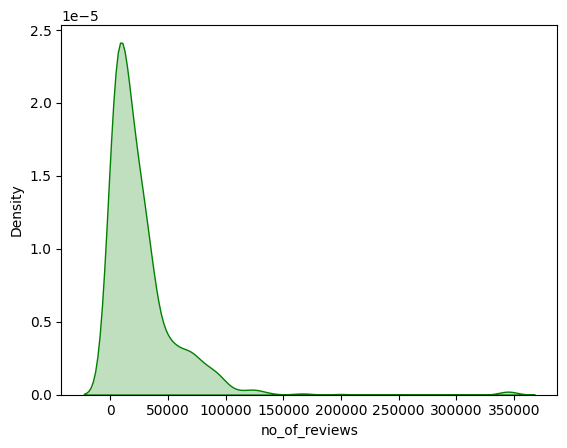

In [21]:
sns.kdeplot(books_df['no_of_reviews'], color='green', fill=True)

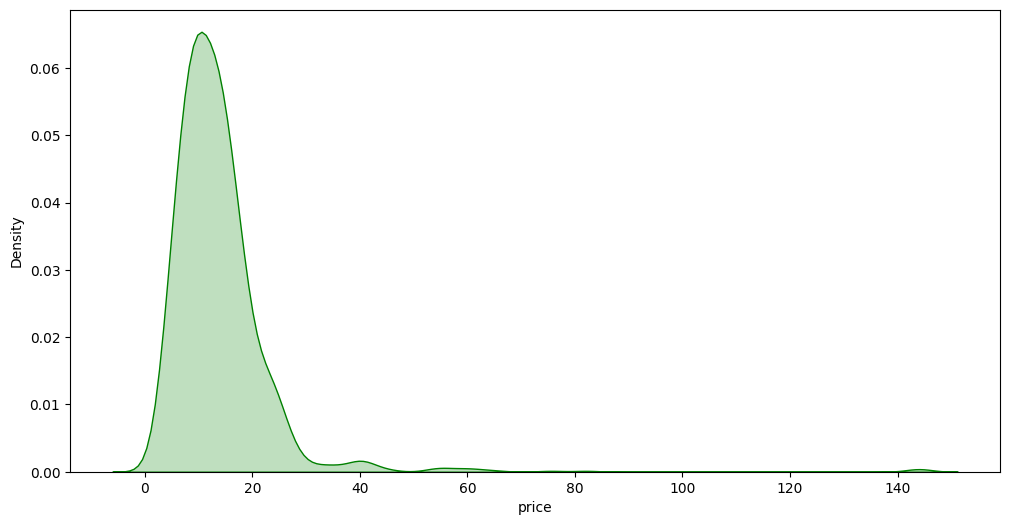

In [22]:
density_plot(books_df, 'price')

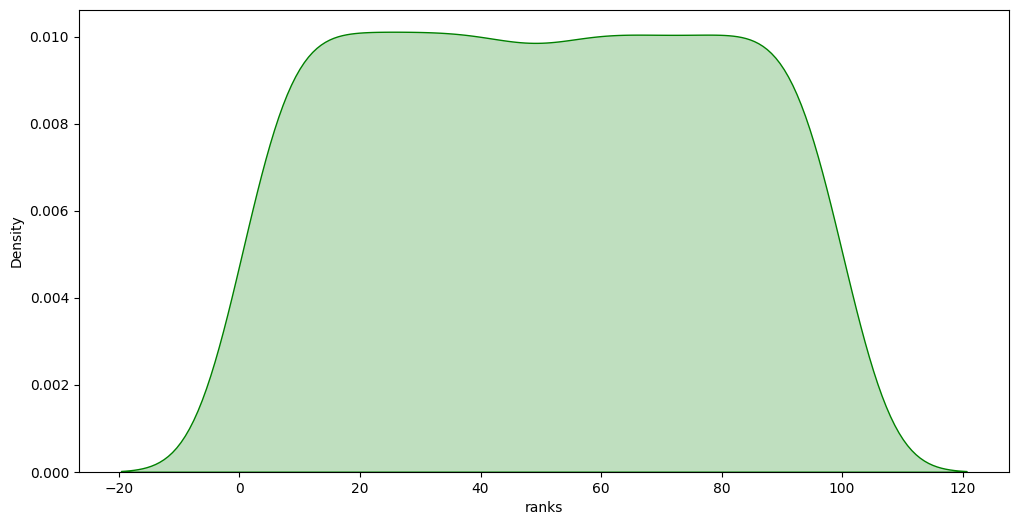

In [23]:
density_plot(books_df, 'ranks')

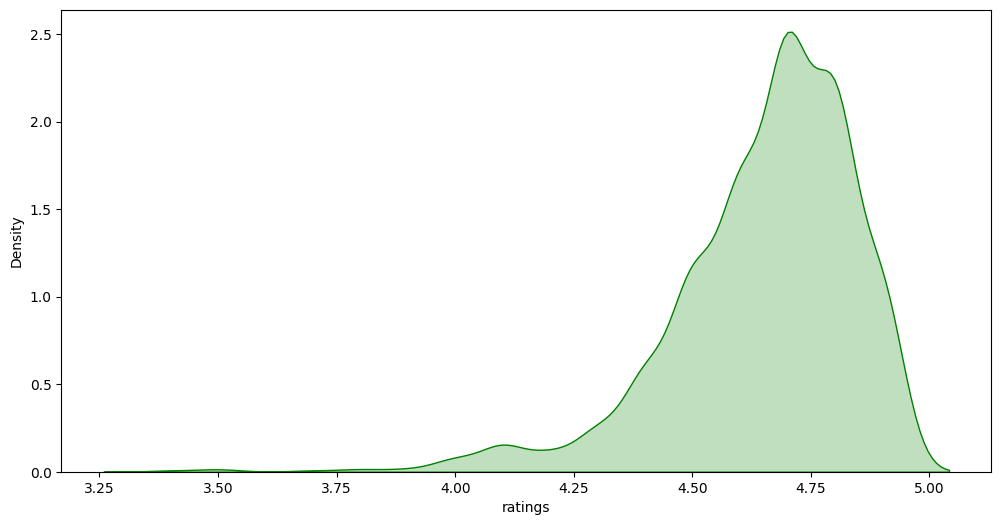

In [24]:
density_plot(books_df, 'ratings')

<AxesSubplot:xlabel='price', ylabel='ranks'>

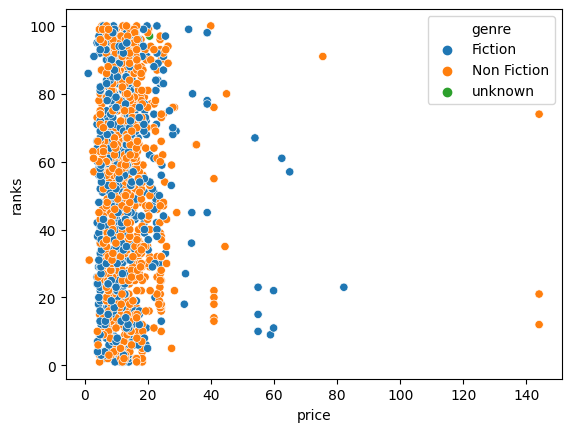

In [25]:
sns.scatterplot(x=books_df.price, y=books_df.ranks, hue=books_df.genre)

<AxesSubplot:xlabel='price', ylabel='ratings'>

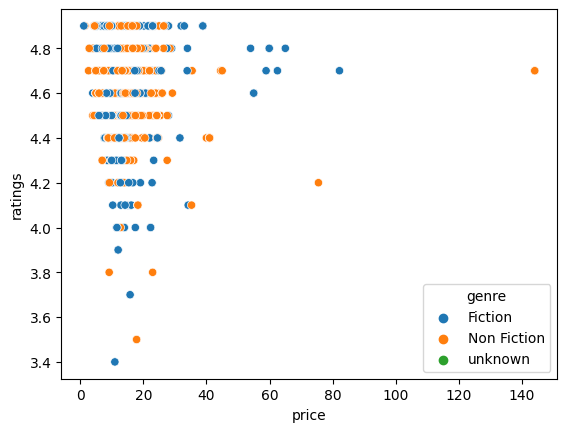

In [26]:
sns.scatterplot(x=books_df.price, y=books_df.ratings, hue=books_df.genre)

In [27]:
books_df.duplicated(keep='first').sum()

0

In [28]:
books_df.groupby('year')['price', 'ranks', 'ratings'].sum()

F:\4.yil_birinci_dnem\Data Science\data\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


price   ranks  ratings
year                          
2009  1619.75  4851.0    444.0
2010  1541.22  4801.0    443.7
2011  1642.22  5000.0    453.5
2012  1652.50  4952.0    453.3
2013  1673.76  5050.0    459.2
2014  1534.82  5000.0    460.7
2015  1271.10  5050.0    465.7
2016  1133.84  4910.0    460.0
2017  1147.61  4973.0    464.1
2018  1215.55  4950.0    464.0
2019  1076.77  4953.0    465.9
2020  1041.70  5050.0    473.8
2021  1135.70  4982.0    468.5

In [29]:
book_year_mean = books_df.groupby('year')['price', 'ranks', 'ratings'].mean()

F:\4.yil_birinci_dnem\Data Science\data\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [30]:
book_year_mean

price      ranks   ratings
year                                
2009  16.698454  50.010309  4.577320
2010  15.888866  49.494845  4.574227
2011  16.588081  50.505051  4.580808
2012  16.691919  50.020202  4.578788
2013  16.737600  50.500000  4.592000
2014  15.503232  50.505051  4.653535
2015  12.711000  50.500000  4.657000
2016  11.569796  50.102041  4.693878
2017  11.592020  50.232323  4.687879
2018  12.278283  50.000000  4.686869
2019  10.876465  50.030303  4.706061
2020  10.417000  50.500000  4.738000
2021  11.471717  50.323232  4.732323

In [31]:
price_year_mean = books_df.groupby('year')[['price']].mean()

In [32]:
price_year_mean

price
year           
2009  16.698454
2010  15.888866
2011  16.588081
2012  16.691919
2013  16.737600
2014  15.503232
2015  12.711000
2016  11.569796
2017  11.592020
2018  12.278283
2019  10.876465
2020  10.417000
2021  11.471717

<AxesSubplot:xlabel='year'>

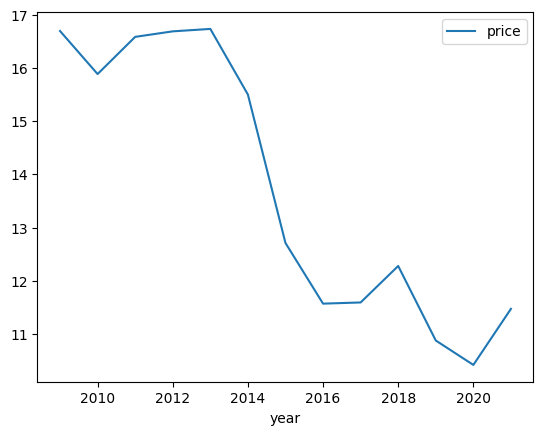

In [33]:
price_year_mean.plot()

(array([2., 3., 1., 1., 0., 0., 0., 0., 2., 4.]),
 array([10.417  , 11.04906, 11.68112, 12.31318, 12.94524, 13.5773 ,
        14.20936, 14.84142, 15.47348, 16.10554, 16.7376 ]),
 <BarContainer object of 10 artists>)

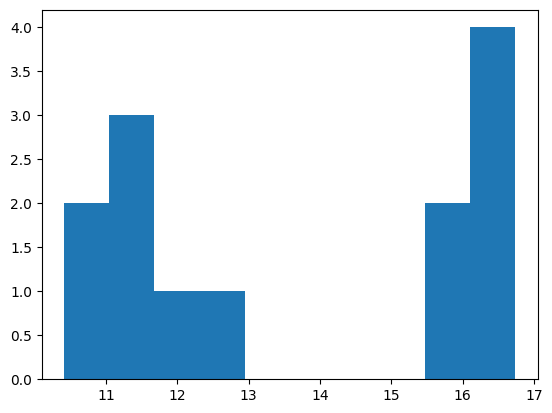

In [34]:
plt.hist(price_year_mean)

Text(0, 0.5, 'Price')

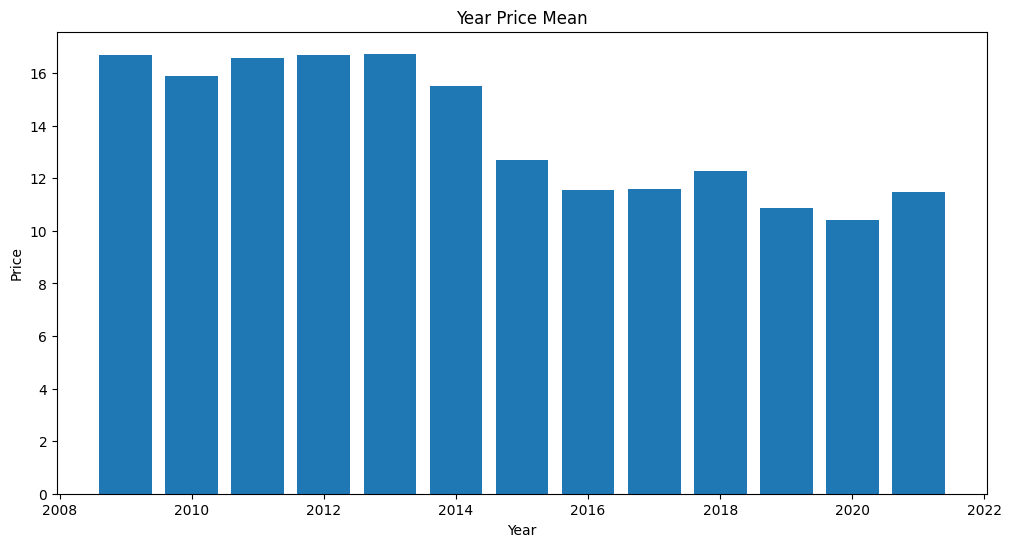

In [35]:
plt.figure(figsize=(12, 6))
plt.title('Year Price Mean')
plt.bar(price_year_mean.index, price_year_mean.price)
plt.xlabel('Year')
plt.ylabel('Price')

<AxesSubplot:xlabel='year', ylabel='price'>

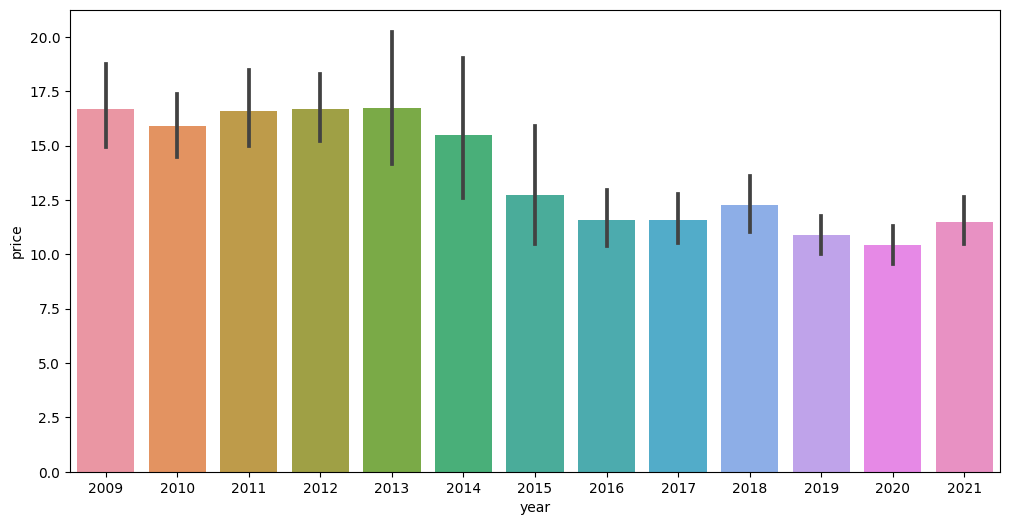

In [36]:
plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='price', data=books_df)

<AxesSubplot:xlabel='year', ylabel='ranks'>

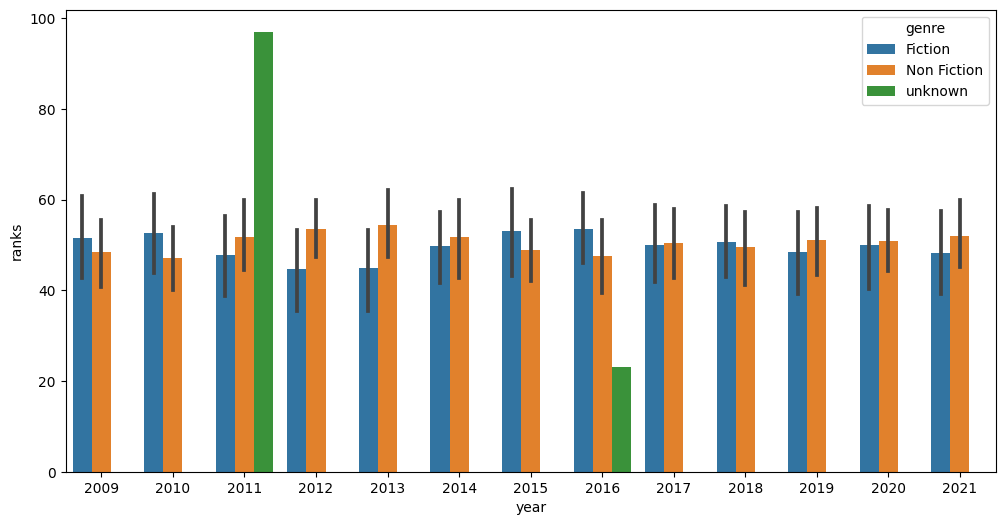

In [37]:
plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='ranks', data=books_df, hue='genre')

<AxesSubplot:xlabel='year', ylabel='ratings'>

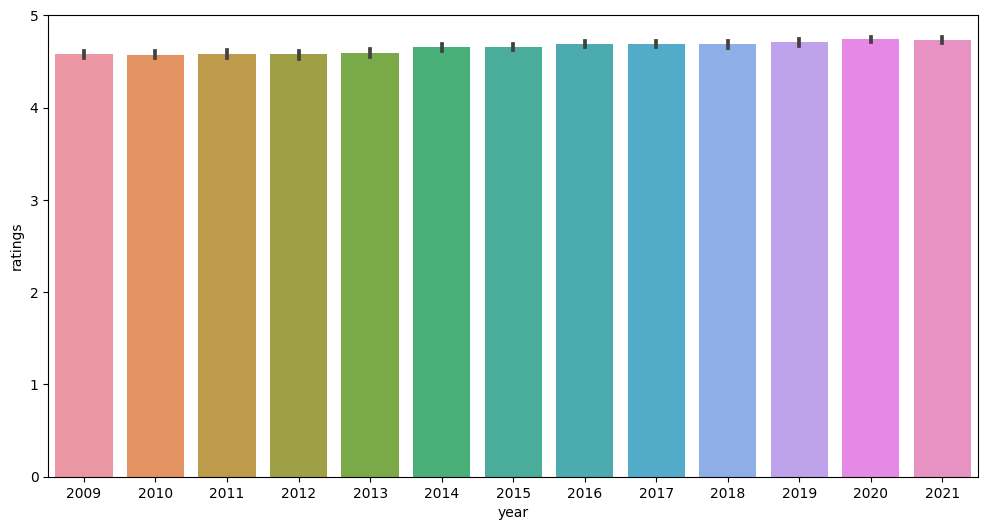

In [38]:
plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='ratings', data=books_df)

<AxesSubplot:xlabel='year', ylabel='ratings'>

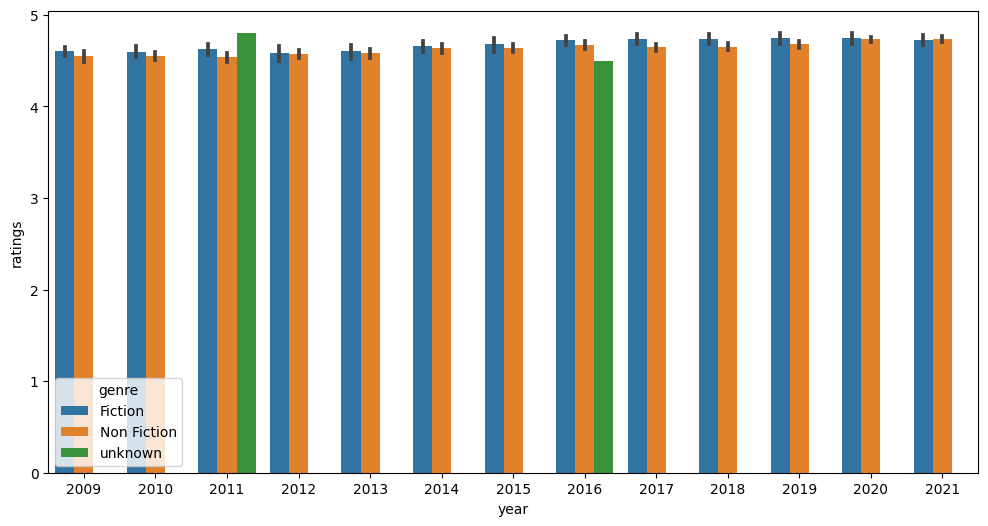

In [39]:
plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='ratings', data=books_df, hue='genre')

<AxesSubplot:xlabel='year', ylabel='ratings'>

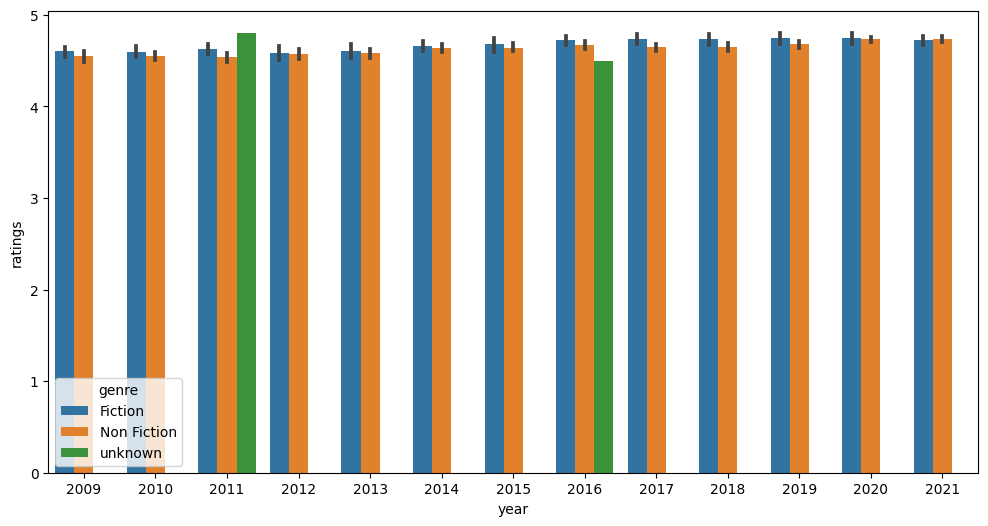

In [40]:
plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='ratings', data=books_df, hue='genre')

## Correlation

In [41]:
correlation = books_df.corr(method='pearson')

Text(0.5, 1.0, 'Pearson Correlation Matrix')

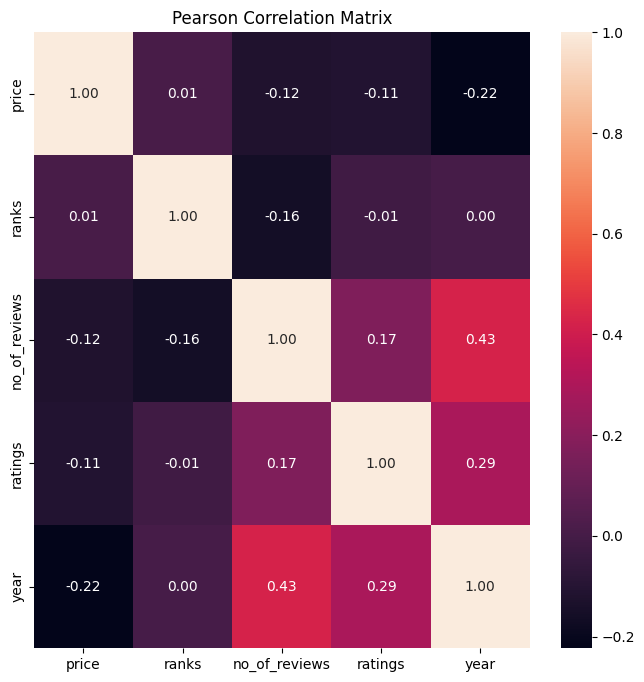

In [42]:
plt.figure(figsize=(8, 8))
sns.heatmap(correlation, annot=True, fmt='.2f')
plt.title('Pearson Correlation Matrix')

## Data Visualization

<AxesSubplot:xlabel='price', ylabel='no_of_reviews'>

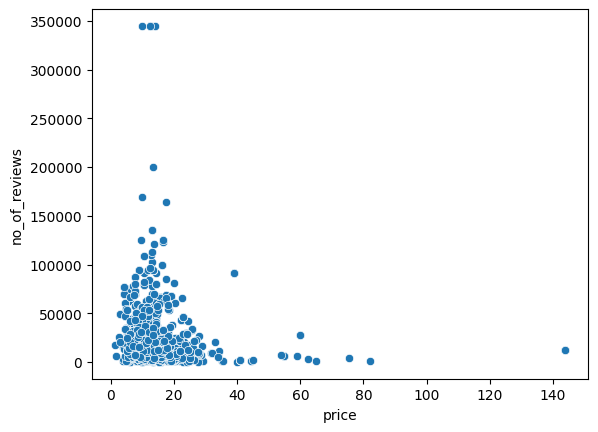

In [43]:
sns.scatterplot(x=books_df.price, y=books_df.no_of_reviews)

<AxesSubplot:xlabel='price', ylabel='no_of_reviews'>

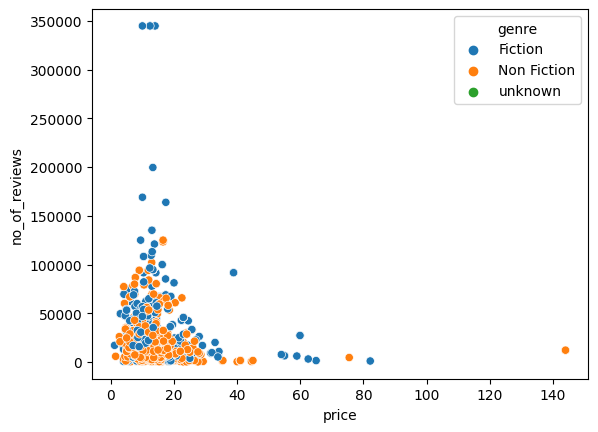

In [44]:
sns.scatterplot(x=books_df.price, y=books_df.no_of_reviews, hue=books_df.genre)

In [45]:
books_df.author.unique()

array(['Dan Brown', 'William P. Young', 'Mark R. Levin',
       'Stephenie Meyer', 'Sarah Palin', 'Gallup', 'Kathryn Stockett',
       'Malcolm Gladwell', 'Glenn Beck', 'Greg Mortenson',
       'Stephen Kendrick', 'Steve Harvey', 'Jeff Kinney', 'Stephen King',
       'Mary Ann Shaffer', 'David Zinczenko', 'Julia Child',
       'Charlaine Harris', 'Audrey Niffenegger',
       'American Psychological Association', 'Edward M. Kennedy',
       'Stieg Larsson', 'W. Cleon Skousen', 'Jim Collins',
       'Maurice Sendak', 'Patrick Lencioni', 'Elizabeth Strout',
       'Steven D. Levitt', 'Francis Chan', 'Rick Riordan',
       'Muriel Barbery', 'James Patterson', 'Randy Pausch',
       'Gary Chapman', 'Alan Moore', 'Stephen R. Covey', 'Bill Simmons',
       'Zhi Gang Sha', 'Andre Agassi', 'Jane Austen',
       'Lifetime Television,', 'Lisa Lillien', 'Christopher McDougall',
       "Bill O'Reilly", 'Ree Drummond', 'Markus Zusak', 'Pat Conroy',
       'Michael Pollan', 'Jillian Michaels', 'John 

In [46]:
books_df.shape

(1285, 9)

In [47]:
books_df.cover_type.unique()

array(['Hardcover', 'Paperback', 'Mass Market Paperback', 'Spiral-bound',
       'Board book', 'Printed Access Code', 'Pamphlet', 'Cards'],
      dtype=object)

<AxesSubplot:xlabel='genre', ylabel='count'>

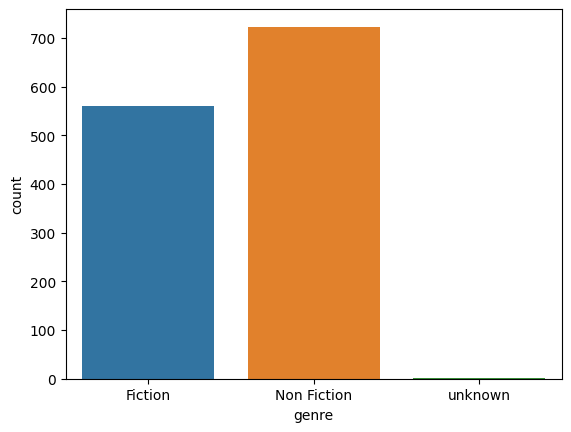

In [48]:
sns.countplot(x='genre', data=books_df)

<AxesSubplot:xlabel='cover_type', ylabel='count'>

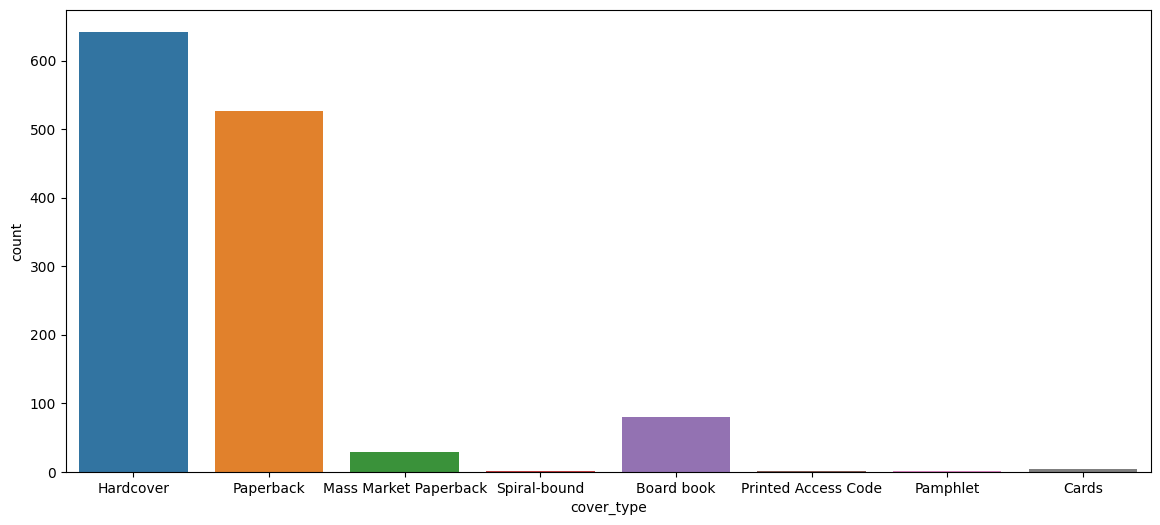

In [49]:
plt.figure(figsize=(14, 6))
sns.countplot(x='cover_type', data=books_df)

In [50]:
num_vars= [ 'price','no_of_reviews','ratings','ranks']       # numerical variables of interest
cat_vars = ['genre','cover_type']

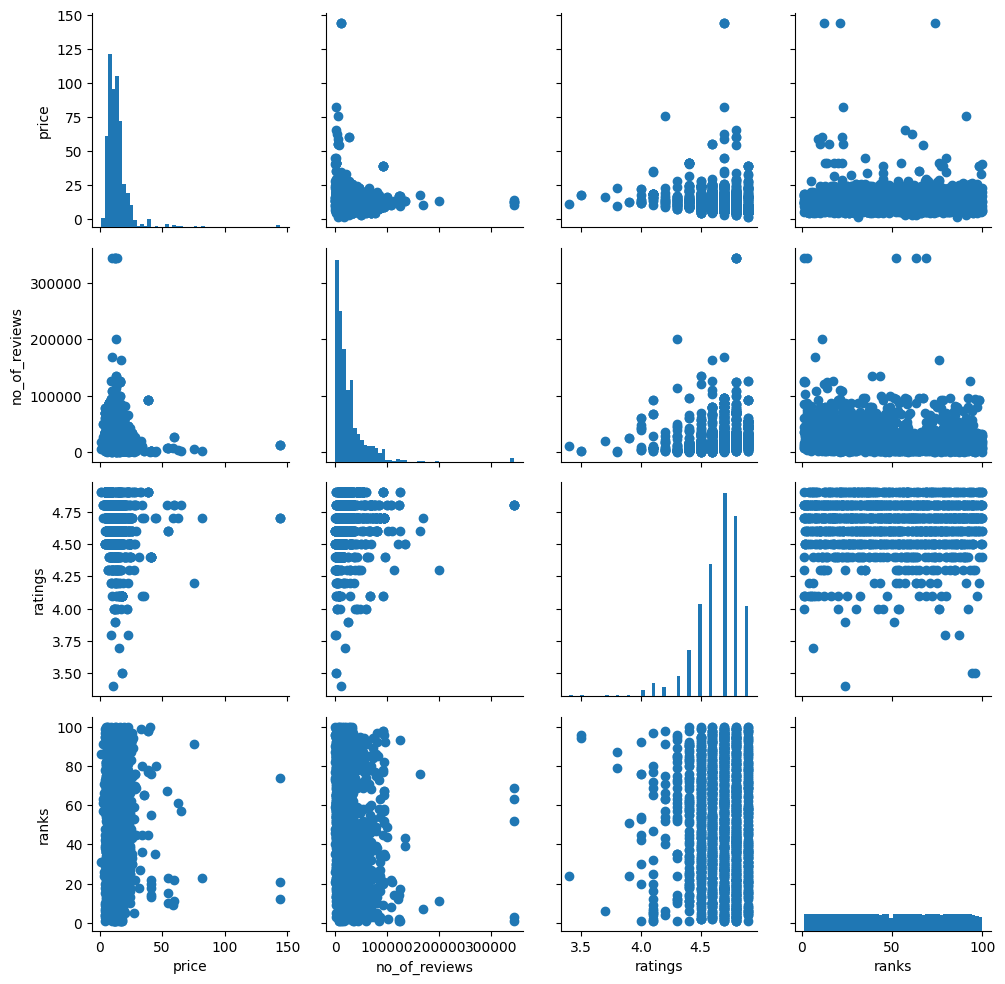

In [51]:
g = sns.PairGrid(data=books_df, vars=num_vars)
g = g.map_diag(plt.hist, bins=50)
g.map_offdiag(plt.scatter)

<AxesSubplot:xlabel='count', ylabel='cover_type'>

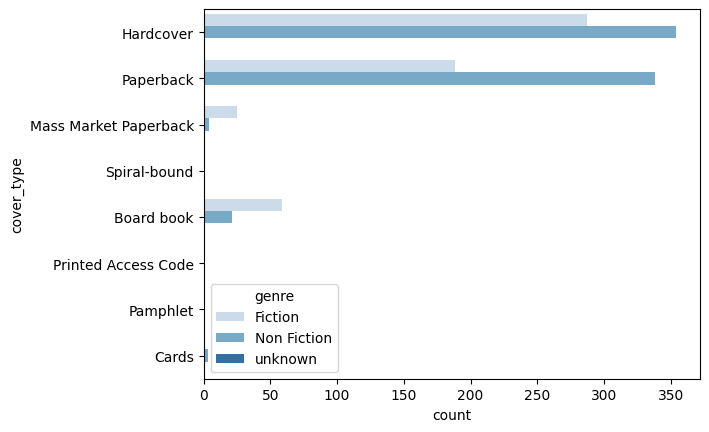

In [52]:
sns.countplot(data=books_df, y='cover_type', hue='genre', palette='Blues')

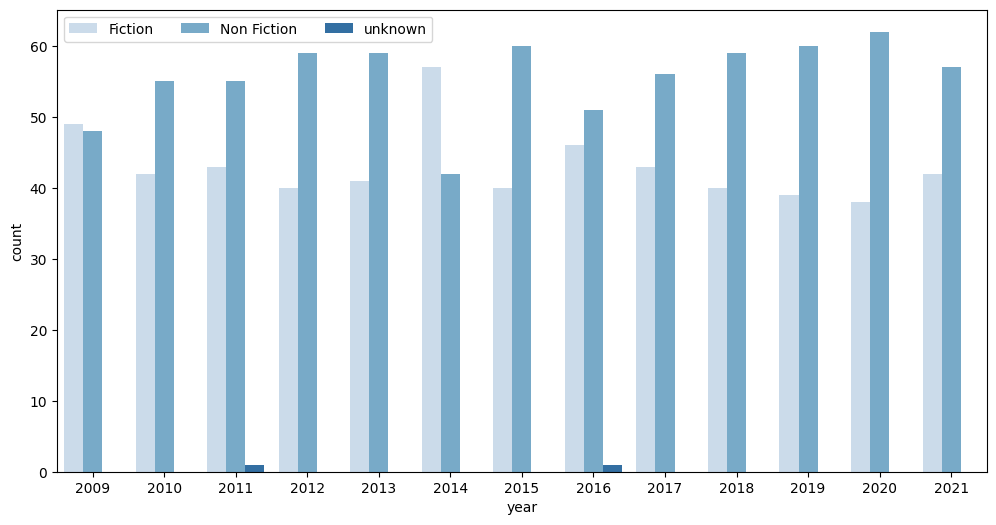

In [53]:
plt.figure(figsize=(12, 6))
sns.countplot(data=books_df, x='year', hue='genre', palette='Blues')
plt.legend(ncol=1)
plt.legend(loc =2 , ncol =5)

In [54]:
books_df[books_df['genre'] == 'unknown']

price  ranks                                              title  \
289  20.61   97.0  Moleskine Classic Notebook, Hard Cover, Large ...   
714   8.99   23.0  Adult Coloring Book Designs: Stress Relief Col...   

     no_of_reviews  ratings                       author cover_type  year  \
289        22268.0      4.8              Moleskine Store  Hardcover  2011   
714         3113.0      4.5  Adult Coloring Book Designs  Paperback  2016   

       genre  
289  unknown  
714  unknown

In [55]:
books_df.genre.shape

(1285,)

In [56]:
books_df[books_df.genre.str.contains('unknown')]

price  ranks                                              title  \
289  20.61   97.0  Moleskine Classic Notebook, Hard Cover, Large ...   
714   8.99   23.0  Adult Coloring Book Designs: Stress Relief Col...   

     no_of_reviews  ratings                       author cover_type  year  \
289        22268.0      4.8              Moleskine Store  Hardcover  2011   
714         3113.0      4.5  Adult Coloring Book Designs  Paperback  2016   

       genre  
289  unknown  
714  unknown

In [57]:
# Drop unknown data in genre column
books_df.where(~(books_df.genre.str.contains('unknown')), np.nan, inplace=True)

In [58]:
import plotly.express as px

In [59]:
books_df.groupby('genre')['title']

In [60]:
temp = books_df.groupby('genre')['title'].agg('count').reset_index()

In [61]:
temp.columns = ['genre', 'title']

In [62]:
temp

genre  title
0      Fiction    560
1  Non Fiction    723

In [63]:
px.pie(temp, labels='genre', values='title', hover_data=['genre'],title="Categories of the books")

([<matplotlib.patches.Wedge at 0x1cb997ea688>,
 [Text(0.2180655270814787, 1.078168551711038, 'Fiction'),
  Text(-0.21806552708147883, -1.078168551711038, 'Non Fiction')],
 [Text(0.11894483295353382, 0.5880919372969297, '43.6%'),
  Text(-0.11894483295353389, -0.5880919372969297, '56.4%')])

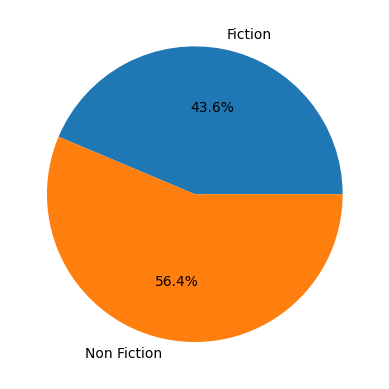

In [64]:
plt.pie(data=temp,x='title', labels='genre', autopct='%1.1f%%')

In [65]:
y = books_df.groupby('author')['ratings'].sum().sort_values().reset_index()[-10:]

In [66]:
def group_by_cols(col1, col2):
    return books_df.groupby(col1)[col2].sum().sort_values().reset_index()[-10:]


In [67]:
y = group_by_cols('author', 'ratings')

In [68]:
def plot_count(col1, col2):
    y = group_by_cols(col1, col2)
    y.plot(x=col1, y=[col2], kind='barh', width=0.8, figsize=(13, 10))
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.weight'] = 'bold'
    plt.rcParams['axes.facecolor'] = 'lightblue'
    plt.title(f'{col1}s with the highest total Rating from 2009 to 2019 years'.title(),
             fontsize=15)
    plt.xlabel(f'total {col2} for the decade'.title(), fontsize=15)
    plt.ylabel(f'{col1}'.title(), fontsize=15)
    plt.xticks(fontsize=15)
    
    plt.legend(loc='lower right')

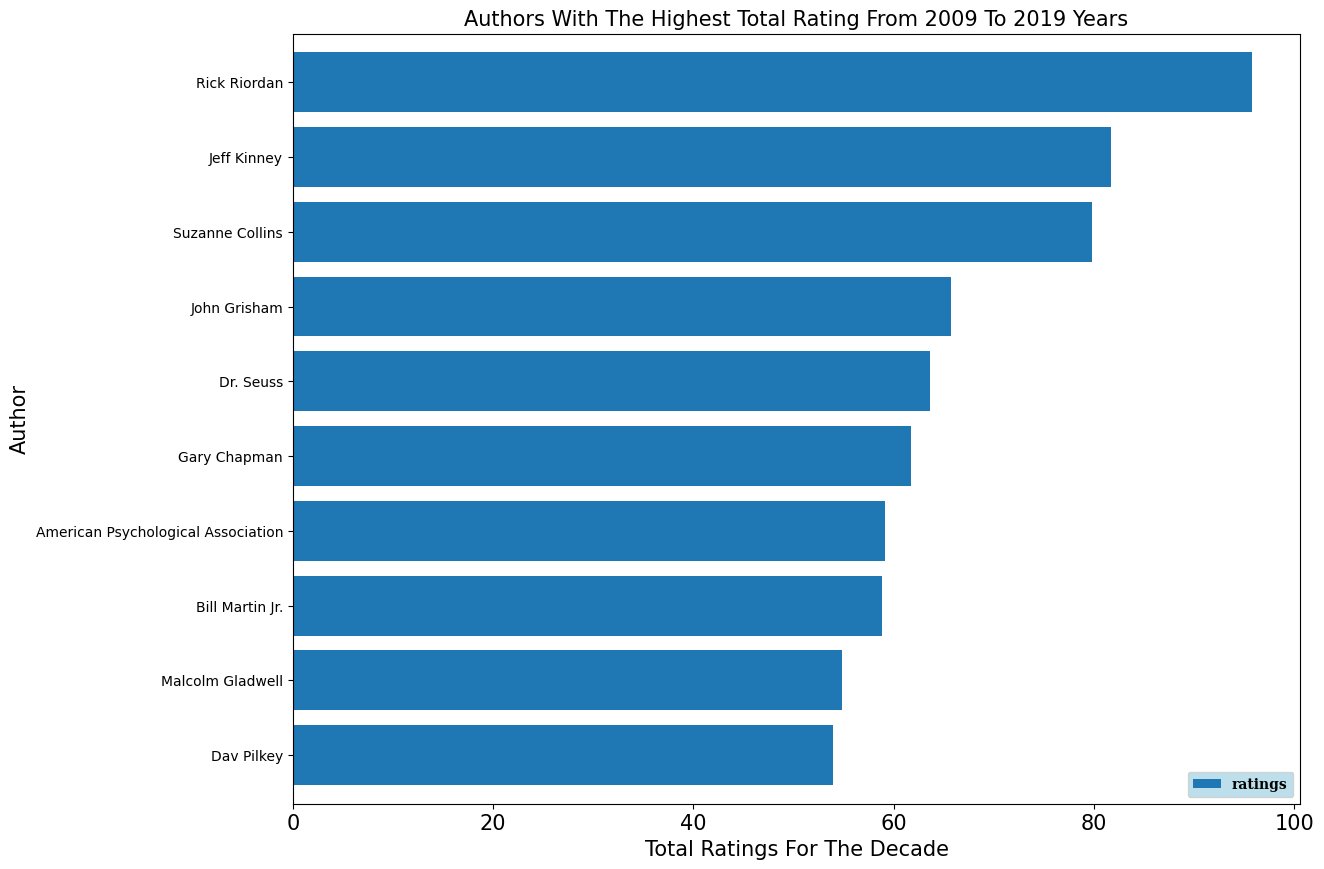

In [69]:
plot_count('author', 'ratings')

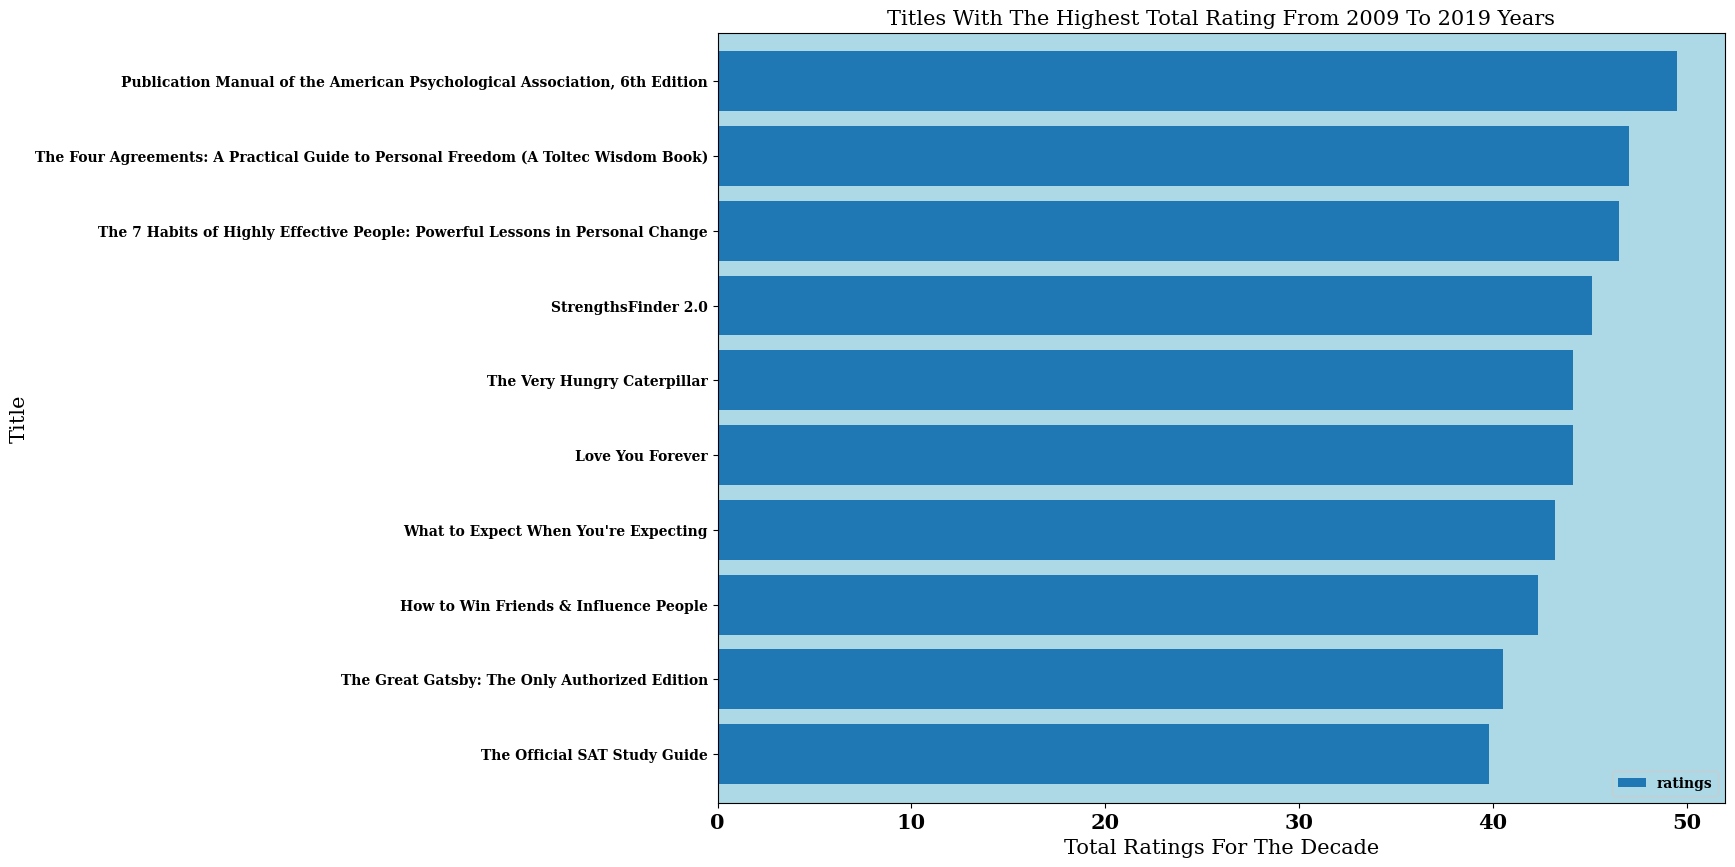

In [70]:
plot_count('title', 'ratings')

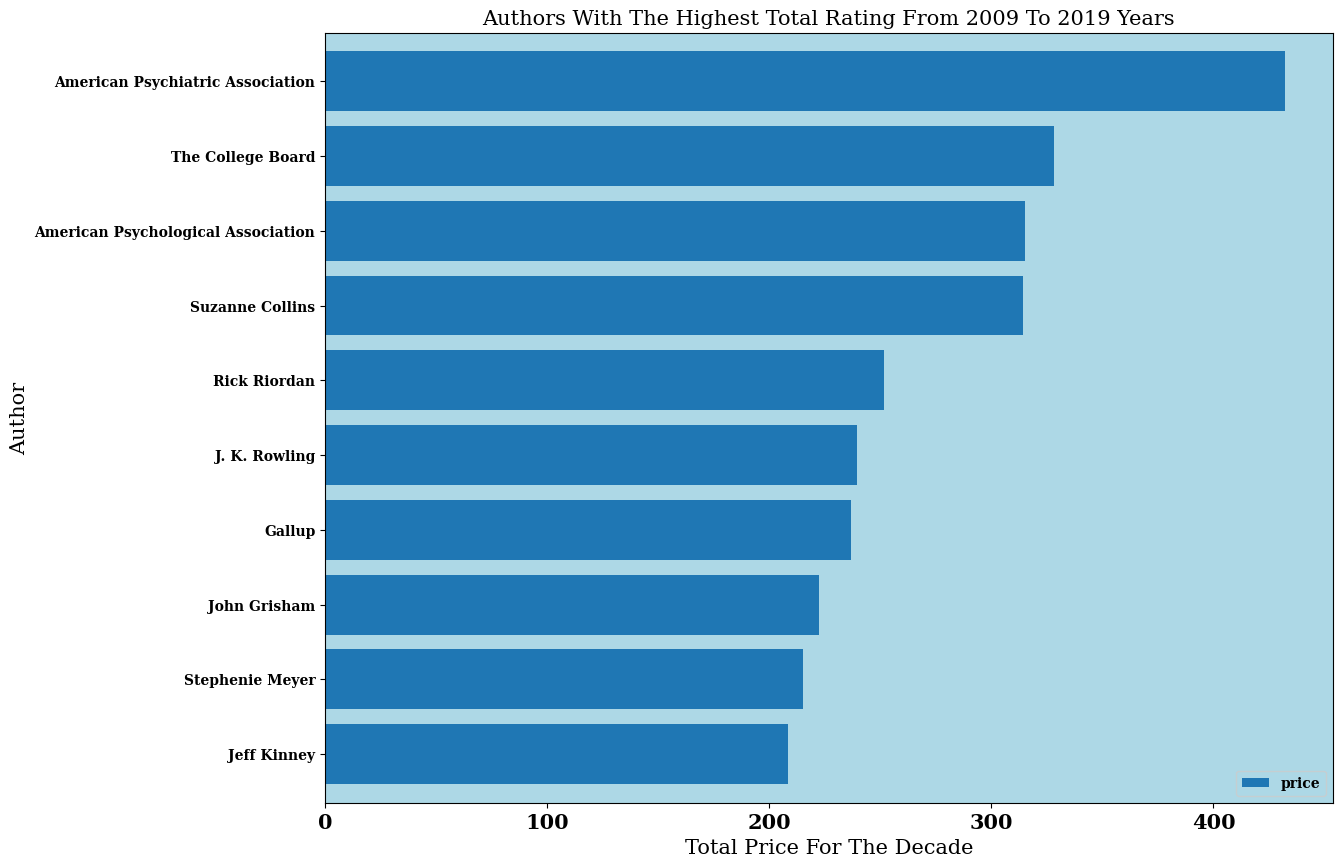

In [71]:
plot_count('author', 'price')

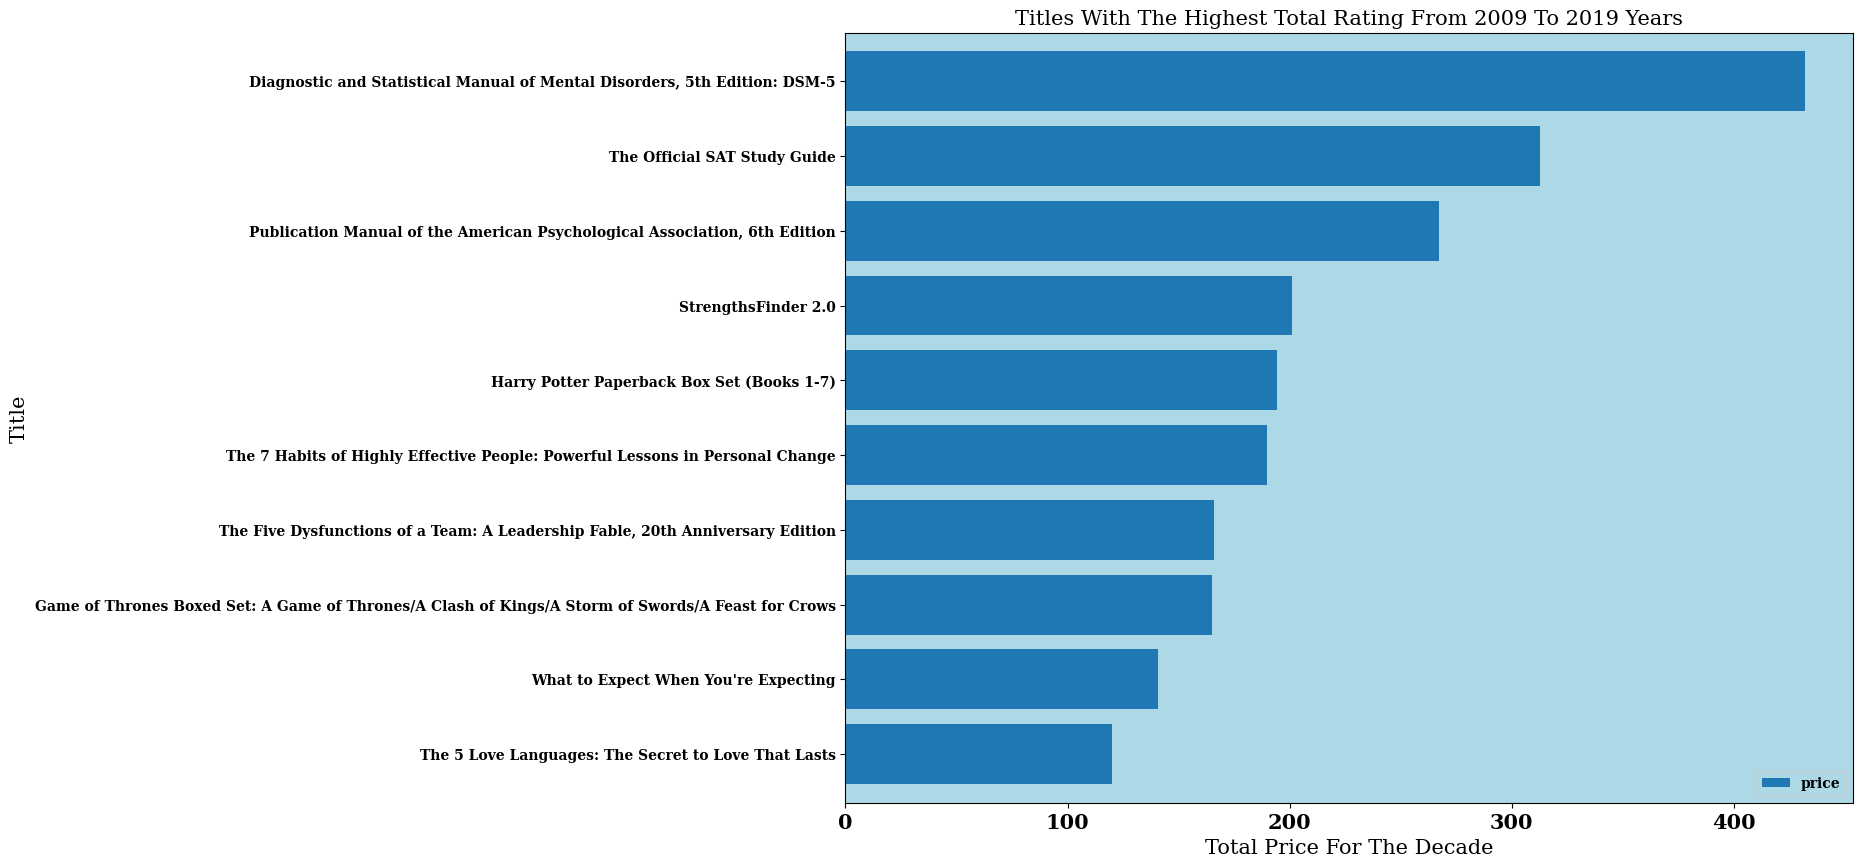

In [72]:
plot_count('title', 'price')

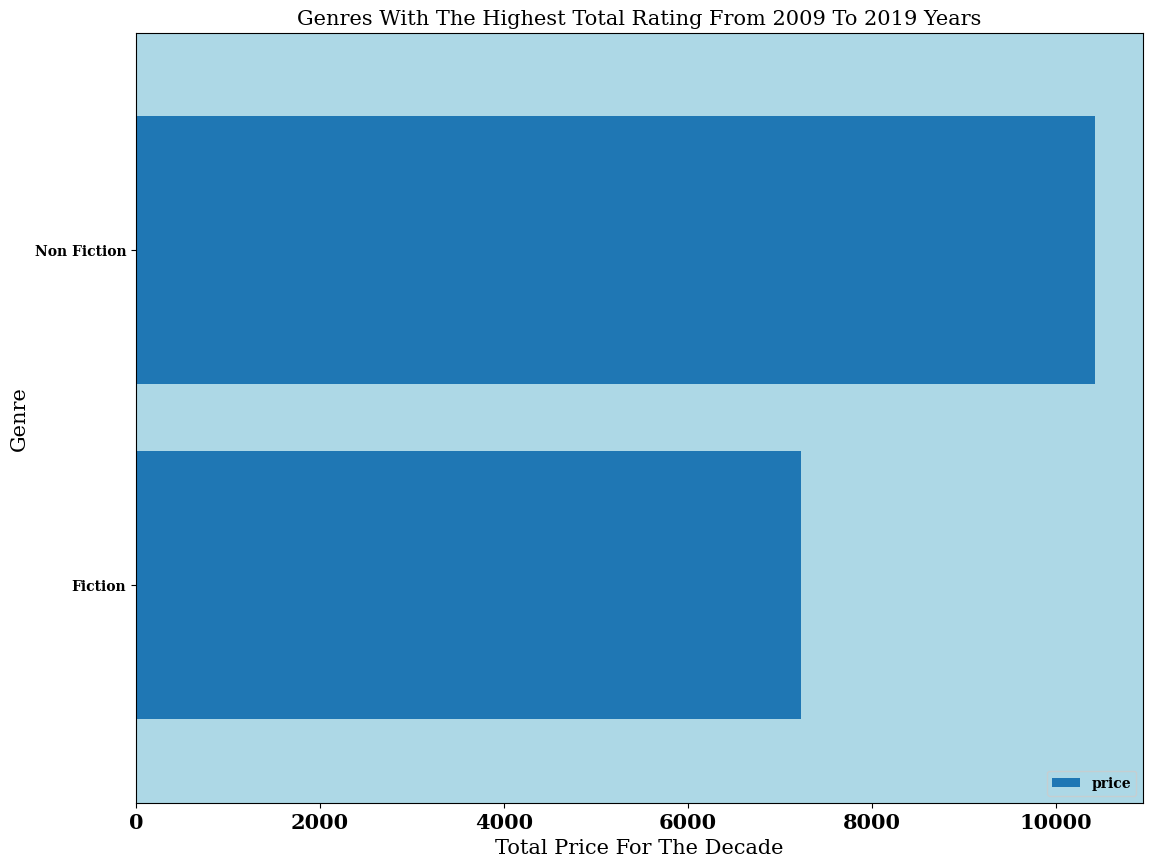

In [73]:
plot_count('genre', 'price')

In [74]:
books_df.head()

price  ranks                                          title  no_of_reviews  \
0  12.49    1.0                                The Lost Symbol        16118.0   
1  13.40    2.0    The Shack: Where Tragedy Confronts Eternity        23392.0   
2   9.93    3.0  Liberty and Tyranny: A Conservative Manifesto         5036.0   
3  14.30    4.0      Breaking Dawn (The Twilight Saga, Book 4)        16912.0   
4   9.99    5.0                  Going Rogue: An American Life         1572.0   

   ratings            author cover_type    year        genre  
0      4.4         Dan Brown  Hardcover  2009.0      Fiction  
1      4.7  William P. Young  Paperback  2009.0      Fiction  
2      4.8     Mark R. Levin  Hardcover  2009.0  Non Fiction  
3      4.7   Stephenie Meyer  Hardcover  2009.0      Fiction  
4      4.6       Sarah Palin  Hardcover  2009.0  Non Fiction

In [78]:
top_rated = books_df[books_df['no_of_reviews'] >= 20000].sort_values(by='no_of_reviews', ascending=False)

In [81]:
top_rated

price  ranks                                              title  \
1242   9.98   52.0                            Where the Crawdads Sing   
991   12.39    1.0                            Where the Crawdads Sing   
1053  13.99   63.0                            Where the Crawdads Sing   
960   12.39   69.0                            Where the Crawdads Sing   
1093  12.39    3.0                            Where the Crawdads Sing   
1201  13.29   11.0                      The Midnight Library: A Novel   
1197   9.99    7.0                       It Ends with Us: A Novel (1)   
1266  17.40   76.0                                             Verity   
1029  12.99   39.0                                 The Silent Patient   
1133  12.99   43.0                                 The Silent Patient   
1283  16.53   93.0                                    A Promised Land   
1091  16.53    1.0                                    A Promised Land   
1207   9.42   17.0         The Seven Husbands of Evelyn Hugo: A Novel   
992   16.50    2.0                                           Becoming   
1104  16.50   14.0                                           Becoming   
892   16.50    1.0                                           Becoming   
1202  13.79   12.0                            The Four Winds: A Novel   
1204  13.08   14.0                 The Last Thing He Told Me: A Novel   
1111  12.77   21.0         American Dirt (Oprah's Book Club): A Novel   
1112  10.35   22.0           The Boy, the Mole, the Fox and the Horse   
1198  10.35    8.0           The Boy, the Mole, the Fox and the Horse   
1092  12.93    2.0  Too Much and Never Enough: How My Family Creat...   
740   16.26   49.0                           The Nightingale: A Novel   
635   16.26   44.0                           The Nightingale: A Novel   
1282  12.32   92.0                        The Vanishing Half: A Novel   
1124  12.32   34.0                        The Vanishing Half: A Novel   
748   13.29   57.0  The Alchemist, 25th Anniversary: A Fable About...   
942   13.29   51.0  The Alchemist, 25th Anniversary: A Fable About...   
1157  13.29   67.0  The Alchemist, 25th Anniversary: A Fable About...   
1055  13.29   65.0  The Alchemist, 25th Anniversary: A Fable About...   

      no_of_reviews  ratings               author cover_type    year  \
1242       344811.0      4.8          Delia Owens  Paperback  2021.0   
991        344811.0      4.8          Delia Owens  Hardcover  2019.0   
1053       344811.0      4.8          Delia Owens  Paperback  2019.0   
960        344811.0      4.8          Delia Owens  Hardcover  2018.0   
1093       344811.0      4.8          Delia Owens  Hardcover  2020.0   
1201       199570.0      4.3            Matt Haig  Hardcover  2021.0   
1197       169014.0      4.7       Colleen Hoover  Paperback  2021.0   
1266       163818.0      4.6       Colleen Hoover  Paperback  2021.0   
1029       135163.0      4.5     Alex Michaelides  Hardcover  2019.0   
1133       135163.0      4.5     Alex Michaelides  Hardcover  2020.0   
1283       125017.0      4.9         Barack Obama  Hardcover  2021.0   
1091       125017.0      4.9         Barack Obama  Hardcover  2020.0   
1207       125004.0      4.6  Taylor Jenkins Reid  Paperback  2021.0   
992        123276.0      4.8       Michelle Obama  Hardcover  2019.0   
1104       123276.0      4.8       Michelle Obama  Hardcover  2020.0   
892        123276.0      4.8       Michelle Obama  Hardcover  2018.0   
1202       121007.0      4.5       Kristin Hannah  Hardcover  2021.0   
1204       113167.0      4.3           Laura Dave  Hardcover  2021.0   
1111       109386.0      4.6      Jeanine Cummins  Hardcover  2020.0   
1112       108231.0      4.8      Charlie Mackesy  Hardcover  2020.0   
1198       108231.0      4.8      Charlie Mackesy  Hardcover  2021.0   
1092       102078.0      4.6  Mary L. Trump Ph.D.  Hardcover  2020.0   
740         99932.0      4.8       Kristin Hannah  Hardcover  2016.0   
635         99

In [79]:
top_rated = top_rated.head(30)

In [83]:
plt.rcParams.update(plt.rcParamsDefault)

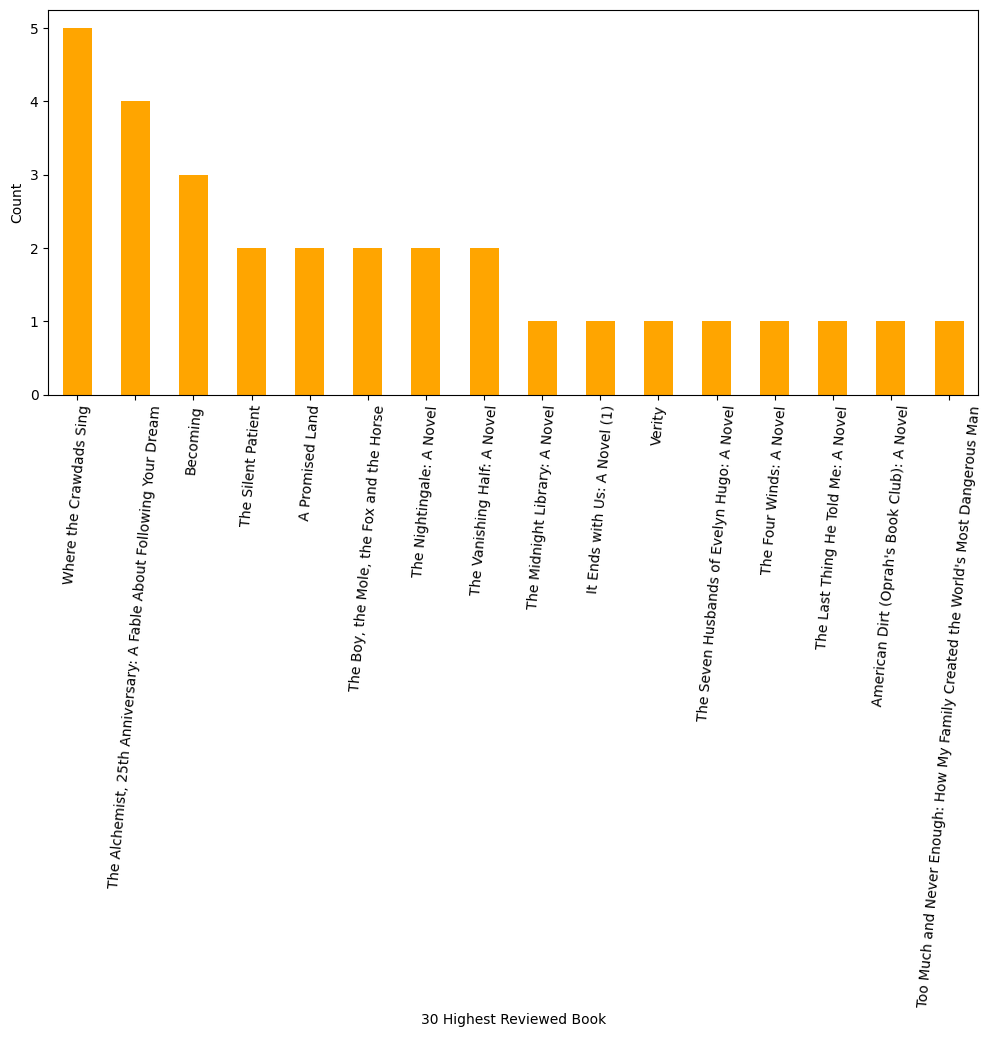

In [88]:
top_rated.title.value_counts().plot(kind='bar', color='Orange', figsize=(12, 5))
plt.xlabel('30 Highest Reviewed Book')
plt.ylabel('Count')
plt.xticks(rotation=85)
plt.show()

In [94]:
def plot_value_counts(df, col, color='Blue', kind='bar'):
    df[col].value_counts().plot(kind=kind, color=color, figsize=(12, 6))
    plt.xlabel('30 Highest Reviewed Book')
    plt.ylabel('Count')
    plt.xticks(rotation=85)
    plt.show()

In [95]:
top_author = books_df[['author', 'no_of_reviews']].sort_values(by='no_of_reviews', ascending=False)

In [96]:
top_author = top_author.head(60)

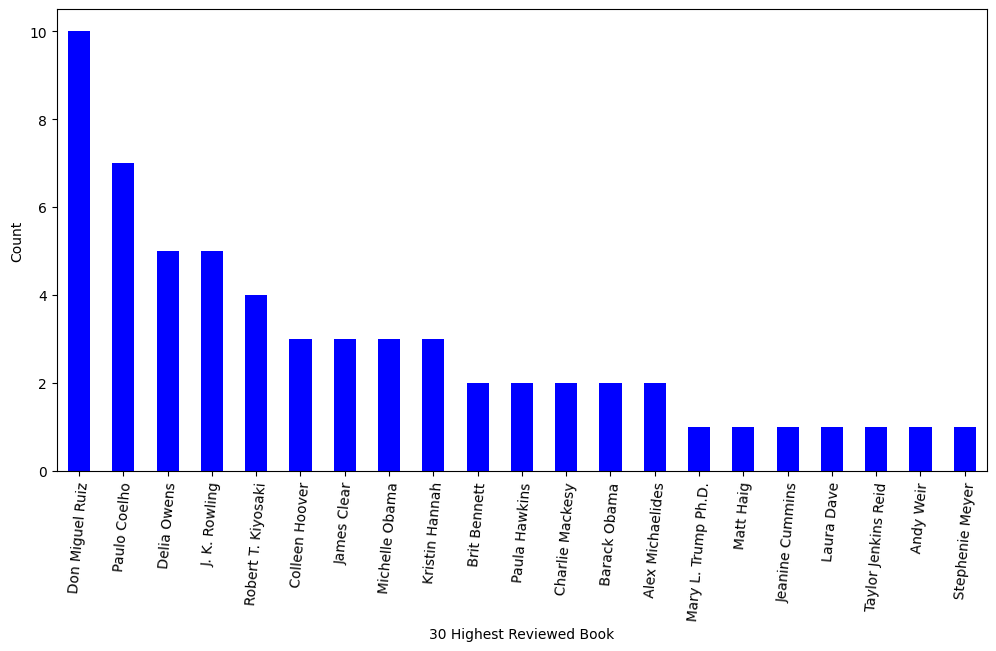

In [97]:
plot_value_counts(top_author, 'author')

In [98]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1285 entries, 0 to 1290
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          1283 non-null   float64
 1   ranks          1283 non-null   float64
 2   title          1283 non-null   object 
 3   no_of_reviews  1283 non-null   float64
 4   ratings        1283 non-null   float64
 5   author         1283 non-null   object 
 6   cover_type     1283 non-null   object 
 7   year           1283 non-null   float64
 8   genre          1283 non-null   object 
dtypes: float64(5), object(4)
memory usage: 132.7+ KB


In [99]:
top_cover = books_df[['cover_type','no_of_reviews']].sort_values(by='no_of_reviews', ascending=False)

In [101]:
top_cover = top_cover.head(60)

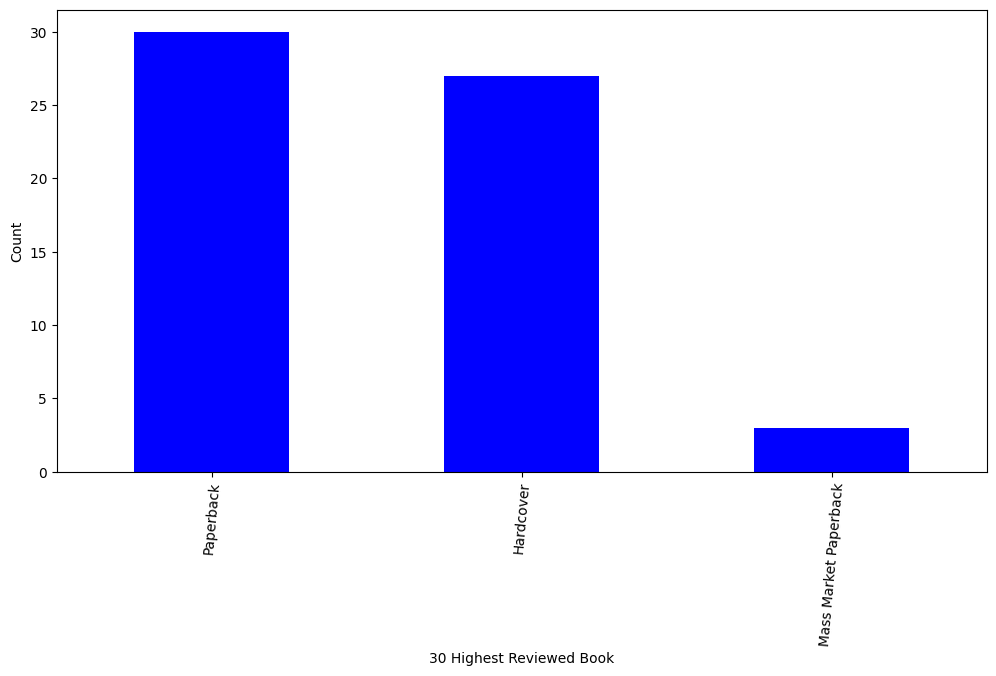

In [102]:
plot_value_counts(top_cover,'cover_type')